In [ ]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D ,MaxPooling2D, Dense, Flatten, Dropout

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
epochs = 10

In [ ]:
train = pd.read_csv('/content/gdrive/MyDrive/dataMinst/sign_mnist_train.csv',header=0)
test = pd.read_csv('/content/gdrive/MyDrive/dataMinst/sign_mnist_test.csv',header=0)

In [ ]:
train.head(5)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [ ]:
test.head(5)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53


In [ ]:
train_data = np.array(train,dtype='float32')
test_data = np.array(test,dtype='float32')

In [ ]:
print('type of train_data is',train_data.dtype,
      'type of test_data is',test_data.dtype)

type of train_data is float32 type of test_data is float32


In [ ]:
class_names = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N',
               'O','P','Q','R','S','T','U','V','W','X','Y']

label for the image is:  D


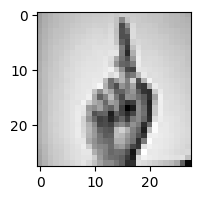

In [ ]:
i = random.randint(1,train.shape[0])
fig1, ax1 =plt.subplots(figsize=(2,2))
plt.imshow(train_data[i,1:].reshape((28,28)),cmap='gray')
print('label for the image is: ',class_names[int(train_data[i,0])])

Text(0.5, 1.0, 'label')

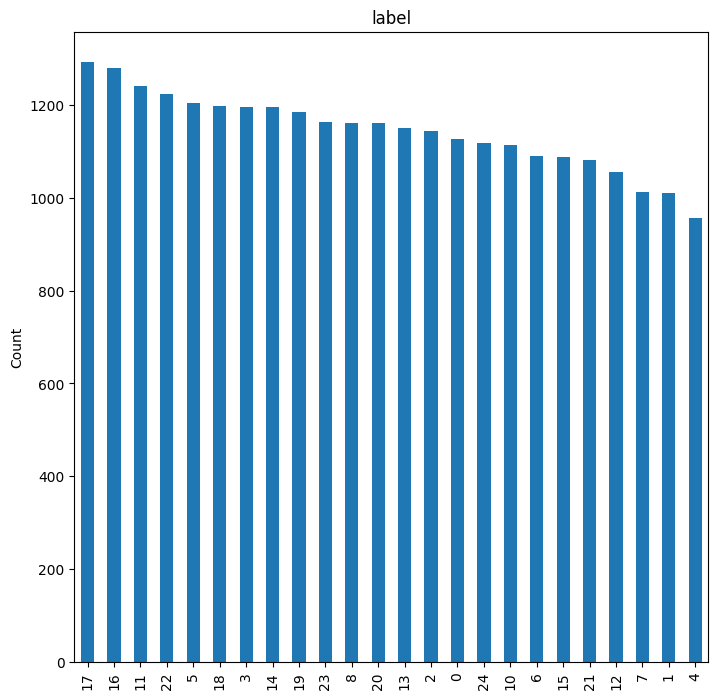

In [ ]:
fig = plt.figure(figsize=(18,18))
ax1 = fig.add_subplot(221)
train['label'].value_counts().plot(kind='bar',ax=ax1)
ax1.set_ylabel('Count')
ax1.set_title('label')

In [ ]:
train_data

array([[  3., 107., 118., ..., 204., 203., 202.],
       [  6., 155., 157., ..., 103., 135., 149.],
       [  2., 187., 188., ..., 195., 194., 195.],
       ...,
       [ 18., 174., 174., ..., 202., 200., 200.],
       [ 17., 177., 181., ...,  64.,  87.,  93.],
       [ 23., 179., 180., ..., 205., 209., 215.]], dtype=float32)

In [ ]:
x_train = train_data[:, 1:]/255.
x_test = test_data[:, 1:]/255.

In [ ]:
x_train

array([[0.41960785, 0.4627451 , 0.49803922, ..., 0.8       , 0.79607844,
        0.7921569 ],
       [0.60784316, 0.6156863 , 0.6117647 , ..., 0.40392157, 0.5294118 ,
        0.58431375],
       [0.73333335, 0.7372549 , 0.7372549 , ..., 0.7647059 , 0.7607843 ,
        0.7647059 ],
       ...,
       [0.68235296, 0.68235296, 0.68235296, ..., 0.7921569 , 0.78431374,
        0.78431374],
       [0.69411767, 0.70980394, 0.72156864, ..., 0.2509804 , 0.34117648,
        0.3647059 ],
       [0.7019608 , 0.7058824 , 0.7058824 , ..., 0.8039216 , 0.81960785,
        0.84313726]], dtype=float32)

In [ ]:
y_train = train_data[:, 0]
y_train_cat= to_categorical(y_train, num_classes=25)

In [ ]:
y_test = test_data[:, 0]
y_test_cat = to_categorical(y_test,num_classes=25)

In [ ]:
print(x_train.shape,x_test.shape)

(27455, 784) (7172, 784)


In [ ]:
x_train = x_train.reshape(x_train.shape[0],*(28,28,1))
x_test = x_test.reshape(x_test.shape[0],*(28,28,1))

In [ ]:
print('x_train.shape is',x_train.shape,'x_test.shape is',x_test.shape)

x_train.shape is (27455, 28, 28, 1) x_test.shape is (7172, 28, 28, 1)


#Model 1 Sequential CNN

In [ ]:
model1 =Sequential()

model1.add(Conv2D(32, (3,3), input_shape= (28,28,1), activation='relu'))
model1.add(MaxPooling2D(pool_size=(2,2)))
model1.add(Dropout(0.2))

model1.add(Conv2D(64, (3,3), activation='relu'))
model1.add(MaxPooling2D(pool_size=(2,2)))
model1.add(Dropout(0.2))

model1.add(Conv2D(128, (3,3), activation='relu'))
model1.add(MaxPooling2D(pool_size=(2,2)))
model1.add(Dropout(0.2))

model1.add(Flatten())
model1.add(Dense(128,activation='relu'))
model1.add(Dense(25,activation='softmax'))

In [ ]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 13, 13, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 5, 5, 64)          0

In [ ]:
model1.compile(loss ='categorical_crossentropy', optimizer='adam', metrics =['acc'])

In [ ]:
history1 = model1.fit(x_train, y_train_cat, batch_size = 128, epochs = epochs, verbose = 1, validation_data = (x_test, y_test_cat))

Epoch 1/10
215/215 [==============================] - 13s 10ms/step - loss: 2.5501 - acc: 0.2165 - val_loss: 1.4145 - val_acc: 0.5230
Epoch 2/10
215/215 [==============================] - 1s 6ms/step - loss: 1.0024 - acc: 0.6583 - val_loss: 0.6567 - val_acc: 0.7876
Epoch 3/10
215/215 [==============================] - 1s 7ms/step - loss: 0.5553 - acc: 0.8135 - val_loss: 0.4954 - val_acc: 0.8296
Epoch 4/10
215/215 [==============================] - 1s 6ms/step - loss: 0.3702 - acc: 0.8744 - val_loss: 0.3534 - val_acc: 0.8839
Epoch 5/10
215/215 [==============================] - 1s 6ms/step - loss: 0.2549 - acc: 0.9160 - val_loss: 0.3273 - val_acc: 0.8917
Epoch 6/10
215/215 [==============================] - 1s 6ms/step - loss: 0.1815 - acc: 0.9422 - val_loss: 0.2624 - val_acc: 0.9144
Epoch 7/10
215/215 [==============================] - 1s 6ms/step - loss: 0.1416 - acc: 0.9553 - val_loss: 0.2736 - val_acc: 0.9099
Epoch 8/10
215/215 [==============================] - 2s 8ms/step - loss: 

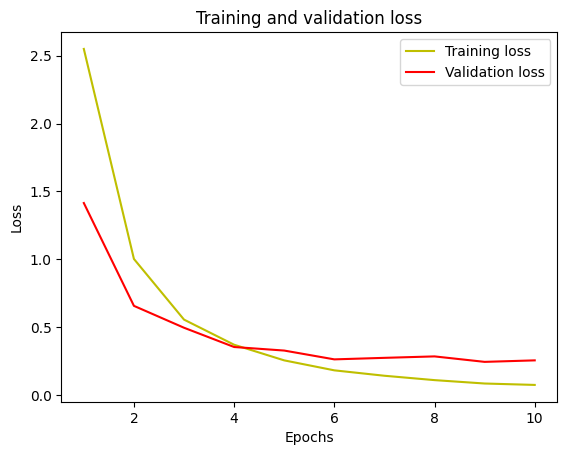

In [ ]:
loss = history1.history['loss']
val_loss = history1.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

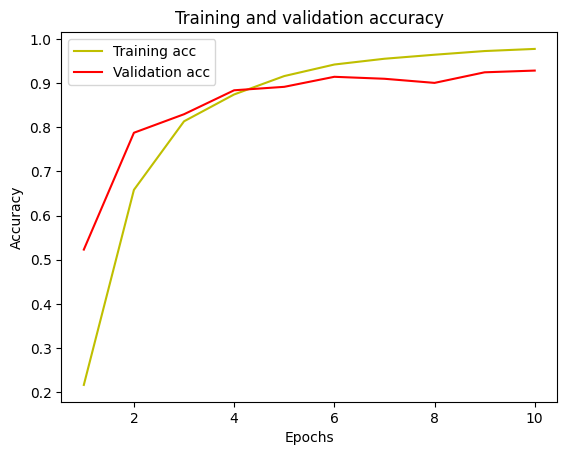

In [ ]:
acc = history1.history['acc']
val_acc = history1.history['val_acc']

plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
prediction1 = np.argmax(model1.predict(x_test),axis=-1)

225/225 [==============================] - 1s 3ms/step


In [ ]:
from sklearn.metrics import accuracy_score
accuracy1 = accuracy_score(y_test, prediction1)
print('Accuracy Score = ', accuracy1)

Accuracy Score =  0.9284718349135527


In [ ]:
model1.save('saved_models/model1.hdf5')

Predicted Label:  K
True Label:  K


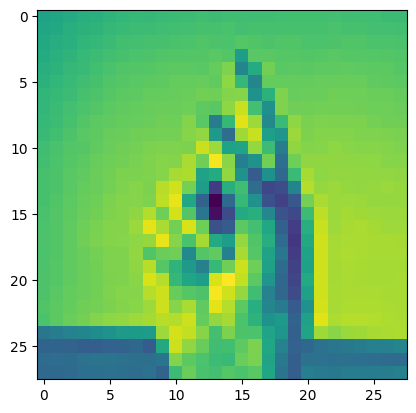

In [ ]:
i = random.randint(1,len(prediction1))
plt.imshow(x_test[i,:,:,0])
print("Predicted Label: ", class_names[int(prediction1[i])])
print("True Label: ", class_names[int(y_test[i])])

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns
#Print confusion matrix
cm = confusion_matrix(y_test, prediction1)

<Axes: >

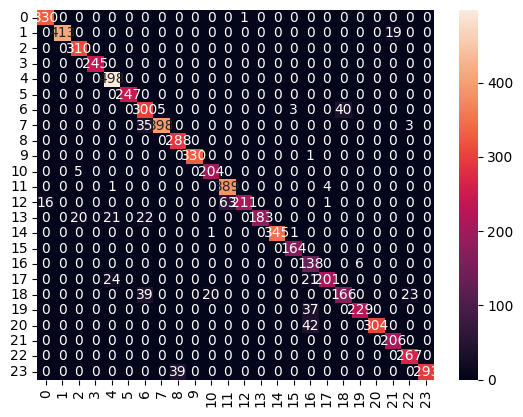

In [ ]:
sns.heatmap(cm,annot=True,fmt='g')

In [ ]:
cp = classification_report(y_test,prediction1)
print(cp)

              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97       331
         1.0       1.00      0.96      0.98       432
         2.0       0.93      1.00      0.96       310
         3.0       1.00      1.00      1.00       245
         4.0       0.92      1.00      0.96       498
         5.0       1.00      1.00      1.00       247
         6.0       0.76      0.86      0.81       348
         7.0       0.99      0.91      0.95       436
         8.0       0.88      1.00      0.94       288
        10.0       1.00      1.00      1.00       331
        11.0       0.91      0.98      0.94       209
        12.0       0.86      0.99      0.92       394
        13.0       1.00      0.73      0.84       291
        14.0       1.00      0.74      0.85       246
        15.0       1.00      0.99      1.00       347
        16.0       0.98      1.00      0.99       164
        17.0       0.58      0.96      0.72       144
        18.0       0.98    

<Axes: >

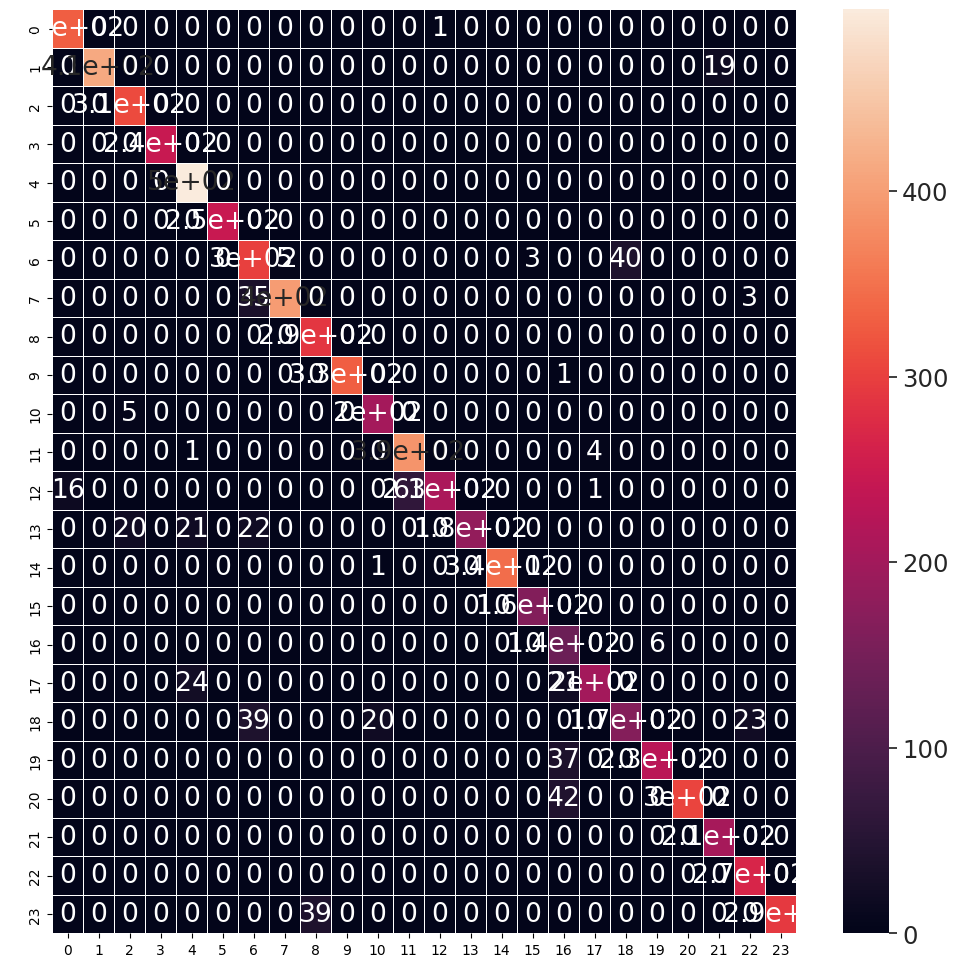

In [ ]:
fig, ax = plt.subplots(figsize=(12,12))
sns.set(font_scale=1.6)
sns.heatmap(cm, annot=True, linewidths=.5, ax=ax)

([<matplotlib.axis.XTick at 0x7fb65c477310>,
 [Text(0, 0, 'A'),
  Text(1, 0, 'B'),
  Text(2, 0, 'C'),
  Text(3, 0, 'D'),
  Text(4, 0, 'E'),
  Text(5, 0, 'F'),
  Text(6, 0, 'G'),
  Text(7, 0, 'H'),
  Text(8, 0, 'I'),
  Text(9, 0, 'J'),
  Text(10, 0, 'K'),
  Text(11, 0, 'L'),
  Text(12, 0, 'M'),
  Text(13, 0, 'N'),
  Text(14, 0, 'O'),
  Text(15, 0, 'P'),
  Text(16, 0, 'Q'),
  Text(17, 0, 'R'),
  Text(18, 0, 'S'),
  Text(19, 0, 'T'),
  Text(20, 0, 'U'),
  Text(21, 0, 'V'),
  Text(22, 0, 'W'),
  Text(23, 0, 'X'),
  Text(24, 0, 'Y')])

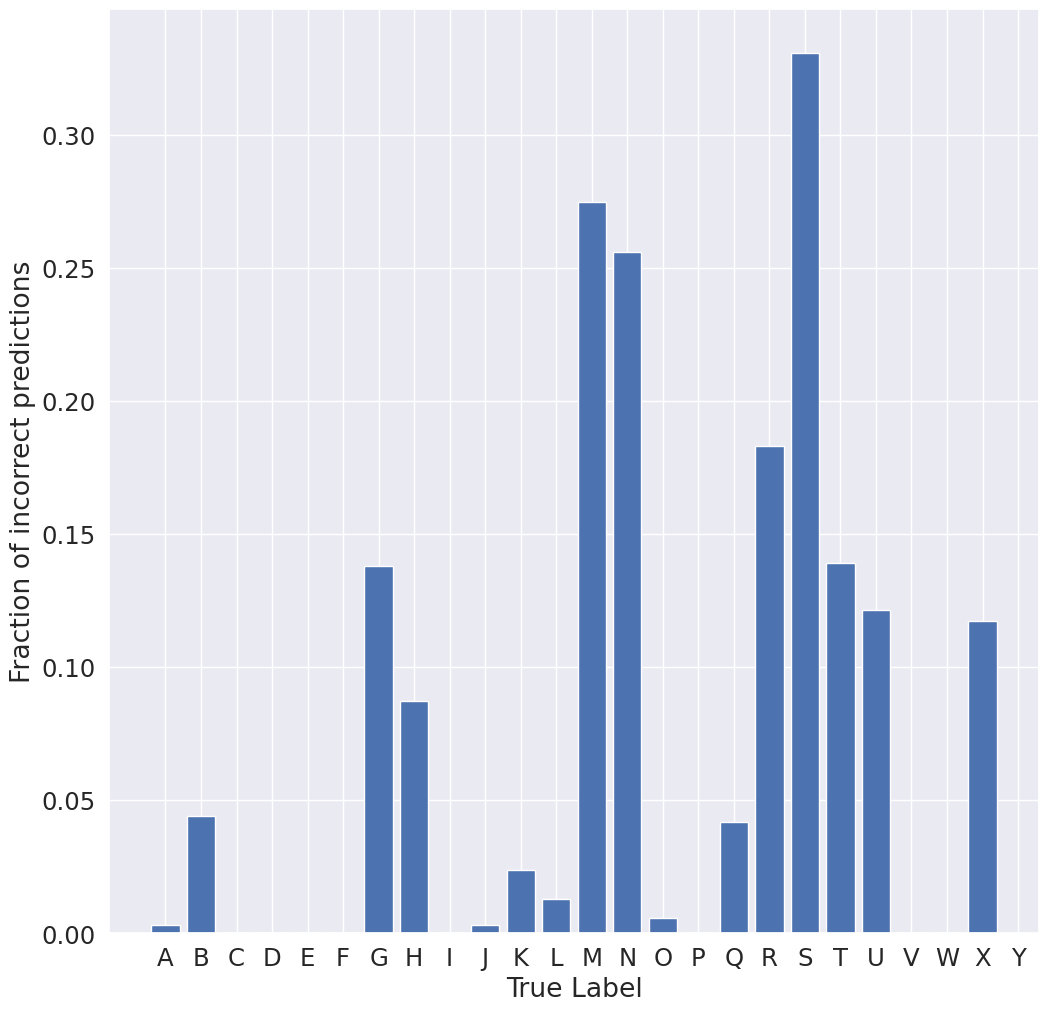

In [ ]:
incorr_fraction = 1 - np.diag(cm) / np.sum(cm, axis=-1)
fig, ax = plt.subplots(figsize=(12,12))
plt.bar(np.arange(24), incorr_fraction)
plt.xlabel('True Label')
plt.ylabel('Fraction of incorrect predictions')
plt.xticks(np.arange(25), class_names)

#Model 2 Sequential

In [ ]:
model2 =Sequential()

model2.add(Conv2D(32, (3,3), input_shape= (28,28,1), activation='relu'))
model2.add(Conv2D(32, (3,3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2,2)))
#model.add(Dropout(0.2))

model2.add(Conv2D(64, (3,3), activation='relu'))
model2.add(Conv2D(64, (3,3), activation='relu'))
model2.add(Conv2D(64, (3,3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2,2)))
#model.add(Dropout(0.2))

model2.add(Conv2D(128, (3,3), activation='relu'))
model2.add(Conv2D(25, (1,1)))
#model.add(MaxPooling2D(pool_size=(2,2)))
#model.add(Dropout(0.2))

model2.add(Flatten())
#model.add(Dense(128,activation='relu'))
model2.add(Dense(25,activation='softmax'))

In [ ]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_4 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 10, 10, 64)        18496     
                                                                 
 conv2d_6 (Conv2D)           (None, 8, 8, 64)          36928     
                                                                 
 conv2d_7 (Conv2D)           (None, 6, 6, 64)          36928     
                                                      

In [ ]:
model2.compile(loss ='categorical_crossentropy', optimizer='adam', metrics =['acc'])

In [ ]:
history2 = model2.fit(x_train, y_train_cat, batch_size = 128, epochs = 10, verbose = 1, validation_data = (x_test, y_test_cat))

Epoch 1/10
215/215 [==============================] - 7s 12ms/step - loss: 1.6163 - acc: 0.5025 - val_loss: 0.8649 - val_acc: 0.7444
Epoch 2/10
215/215 [==============================] - 2s 9ms/step - loss: 0.2322 - acc: 0.9209 - val_loss: 0.9432 - val_acc: 0.7939
Epoch 3/10
215/215 [==============================] - 2s 9ms/step - loss: 0.0534 - acc: 0.9845 - val_loss: 0.8933 - val_acc: 0.8300
Epoch 4/10
215/215 [==============================] - 2s 9ms/step - loss: 0.0148 - acc: 0.9963 - val_loss: 0.7840 - val_acc: 0.8505
Epoch 5/10
215/215 [==============================] - 2s 10ms/step - loss: 4.3045e-04 - acc: 1.0000 - val_loss: 0.8139 - val_acc: 0.8571
Epoch 6/10
215/215 [==============================] - 2s 10ms/step - loss: 2.2419e-04 - acc: 1.0000 - val_loss: 0.8399 - val_acc: 0.8574
Epoch 7/10
215/215 [==============================] - 2s 9ms/step - loss: 1.3985e-04 - acc: 1.0000 - val_loss: 0.8482 - val_acc: 0.8600
Epoch 8/10
215/215 [==============================] - 2s 9ms/

In [ ]:
model2.save('saved_models/model2.hdf5')

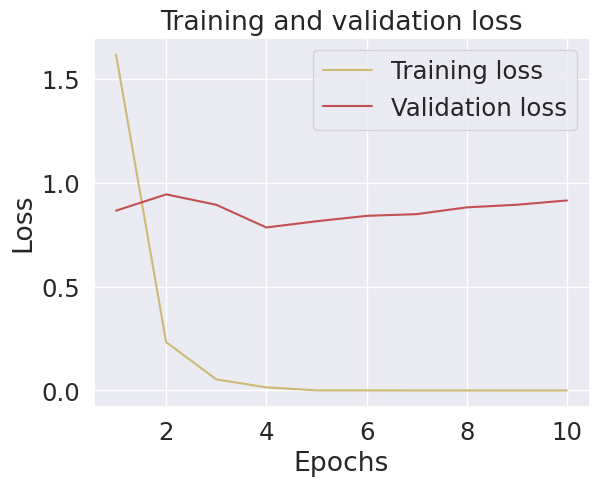

In [ ]:
loss = history2.history['loss']
val_loss = history2.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

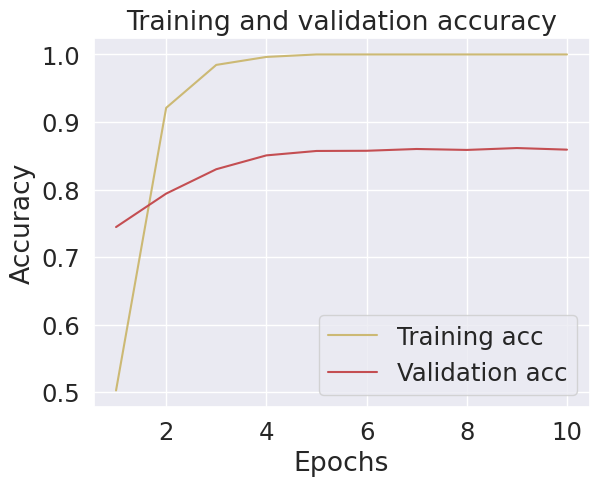

In [ ]:
acc = history2.history['acc']
val_acc = history2.history['val_acc']

plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
prediction2 = np.argmax(model2.predict(x_test),axis=-1)

225/225 [==============================] - 1s 2ms/step


In [ ]:
from sklearn.metrics import accuracy_score
accuracy2 = accuracy_score(y_test, prediction2)
print('Accuracy Score = ', accuracy2)

Accuracy Score =  0.8590351366424986


Predicted Label:  N
True Label:  N


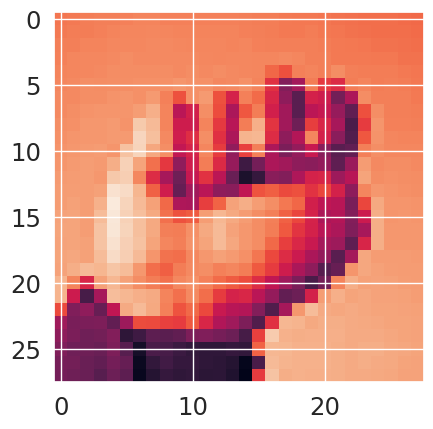

In [ ]:
i = random.randint(1,len(prediction2))
plt.imshow(x_test[i,:,:,0])
print("Predicted Label: ", class_names[int(prediction2[i])])
print("True Label: ", class_names[int(y_test[i])])

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
#Print confusion matrix
cm = confusion_matrix(y_test, prediction2)

<Axes: >

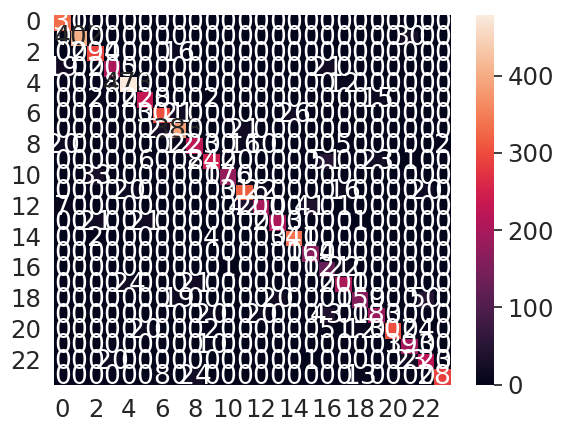

In [ ]:
sns.heatmap(cm,annot=True,fmt='g')

<Axes: >

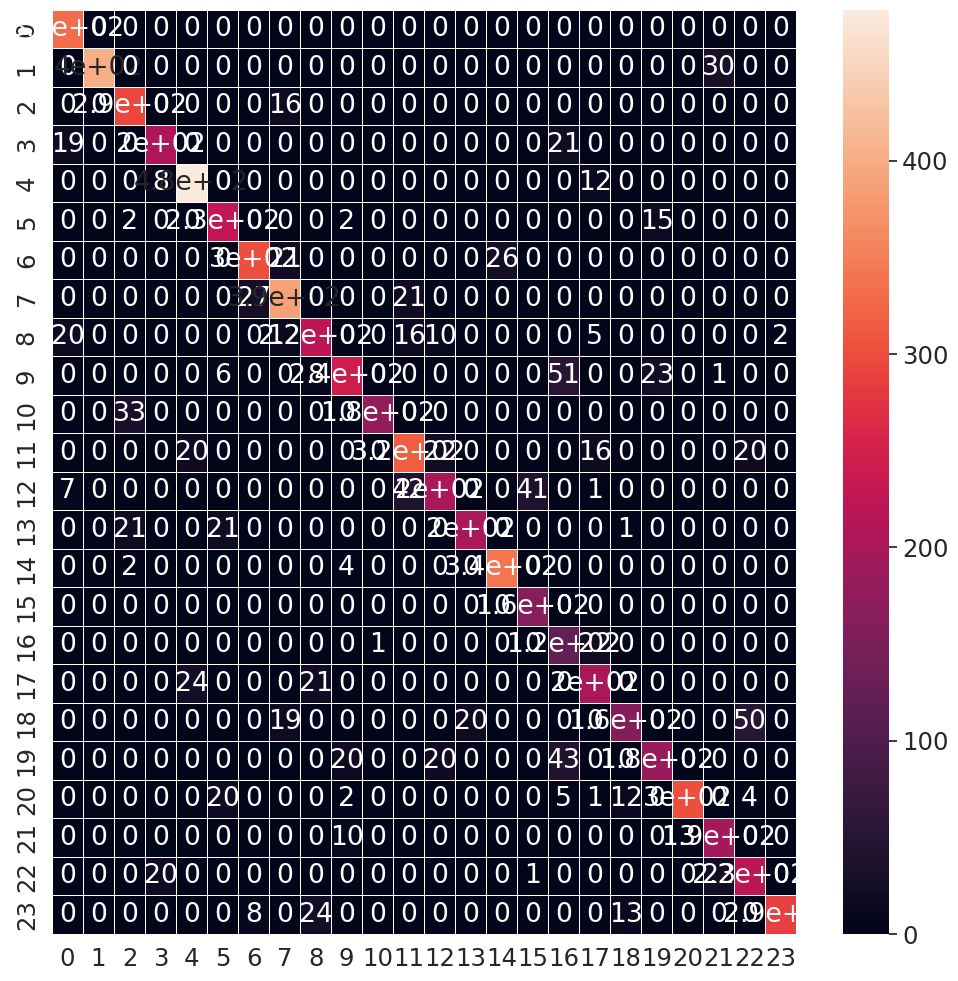

In [ ]:
fig, ax = plt.subplots(figsize=(12,12))
sns.set(font_scale=1.6)
sns.heatmap(cm, annot=True, linewidths=.5, ax=ax)

([<matplotlib.axis.XTick at 0x7fb65646c280>,
 [Text(0, 0, 'A'),
  Text(1, 0, 'B'),
  Text(2, 0, 'C'),
  Text(3, 0, 'D'),
  Text(4, 0, 'E'),
  Text(5, 0, 'F'),
  Text(6, 0, 'G'),
  Text(7, 0, 'H'),
  Text(8, 0, 'I'),
  Text(9, 0, 'J'),
  Text(10, 0, 'K'),
  Text(11, 0, 'L'),
  Text(12, 0, 'M'),
  Text(13, 0, 'N'),
  Text(14, 0, 'O'),
  Text(15, 0, 'P'),
  Text(16, 0, 'Q'),
  Text(17, 0, 'R'),
  Text(18, 0, 'S'),
  Text(19, 0, 'T'),
  Text(20, 0, 'U'),
  Text(21, 0, 'V'),
  Text(22, 0, 'W'),
  Text(23, 0, 'X'),
  Text(24, 0, 'Y')])

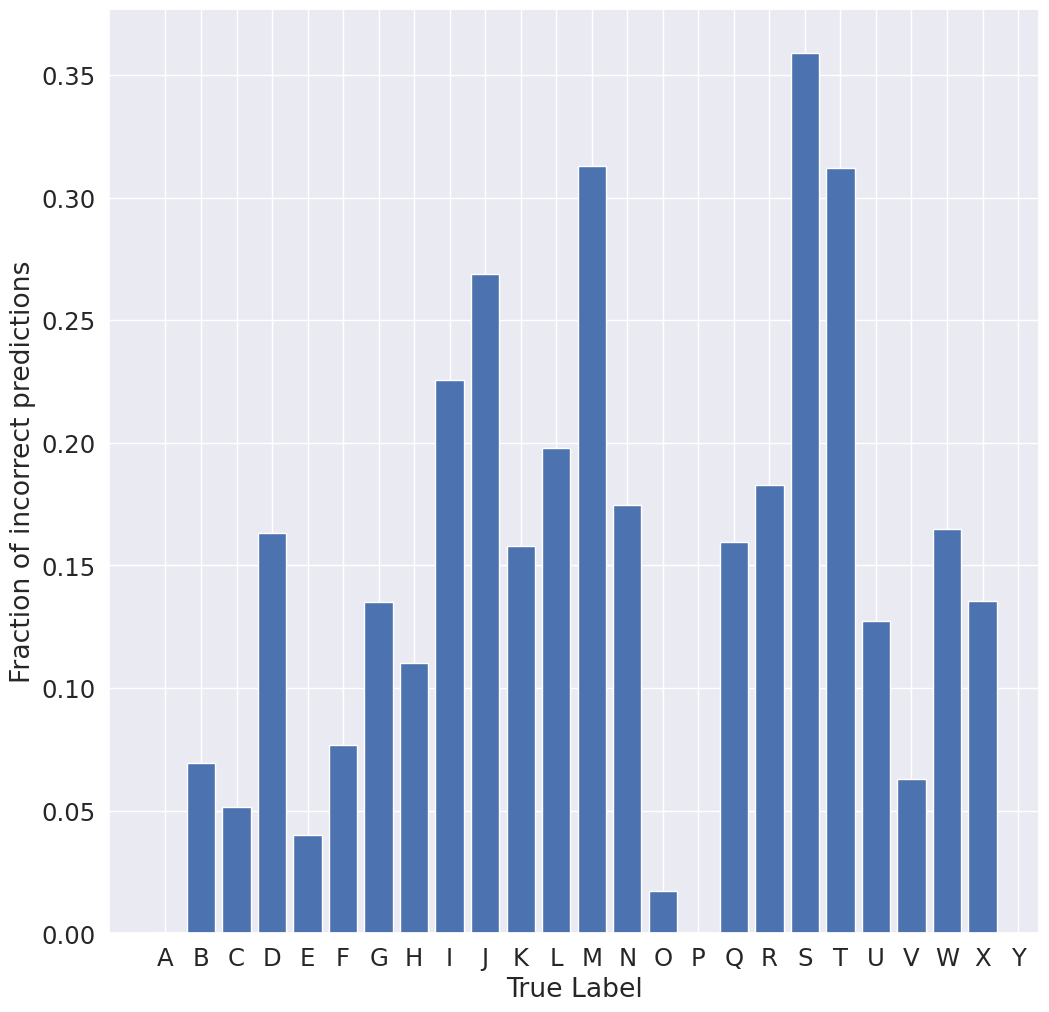

In [ ]:
incorr_fraction = 1 - np.diag(cm) / np.sum(cm, axis=-1)
fig, ax = plt.subplots(figsize=(12,12))
plt.bar(np.arange(24), incorr_fraction)
plt.xlabel('True Label')
plt.ylabel('Fraction of incorrect predictions')
plt.xticks(np.arange(25), class_names)

#Model 3 Sequential

In [ ]:
model3 =Sequential()

model3.add(Conv2D(32, (3,3), input_shape= (28,28,1), activation='relu'))
model3.add(MaxPooling2D(pool_size=(2,2)))
model3.add(Dropout(0.2))

model3.add(Conv2D(64, (3,3), activation='relu'))
model3.add(MaxPooling2D(pool_size=(2,2)))
model3.add(Dropout(0.2))



model3.add(Flatten())
model3.add(Dense(25,activation='softmax'))

In [ ]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 13, 13, 32)        0         
                                                                 
 conv2d_11 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 5, 5, 64)         

In [ ]:
model3.compile(loss ='categorical_crossentropy', optimizer='adam', metrics =['acc'])

In [ ]:
history3 = model3.fit(x_train, y_train_cat, batch_size = 128, epochs = 10, verbose = 1, validation_data = (x_test, y_test_cat))

Epoch 1/10
215/215 [==============================] - 3s 7ms/step - loss: 1.8875 - acc: 0.4541 - val_loss: 0.9761 - val_acc: 0.6860
Epoch 2/10
215/215 [==============================] - 1s 5ms/step - loss: 0.5709 - acc: 0.8238 - val_loss: 0.5482 - val_acc: 0.8246
Epoch 3/10
215/215 [==============================] - 1s 5ms/step - loss: 0.2749 - acc: 0.9177 - val_loss: 0.3687 - val_acc: 0.8919
Epoch 4/10
215/215 [==============================] - 1s 5ms/step - loss: 0.1511 - acc: 0.9585 - val_loss: 0.3574 - val_acc: 0.8942
Epoch 5/10
215/215 [==============================] - 2s 7ms/step - loss: 0.0907 - acc: 0.9779 - val_loss: 0.3392 - val_acc: 0.8945
Epoch 6/10
215/215 [==============================] - 2s 7ms/step - loss: 0.0628 - acc: 0.9841 - val_loss: 0.2704 - val_acc: 0.9168
Epoch 7/10
215/215 [==============================] - 1s 6ms/step - loss: 0.0416 - acc: 0.9906 - val_loss: 0.2860 - val_acc: 0.9123
Epoch 8/10
215/215 [==============================] - 1s 6ms/step - loss: 0.

In [ ]:
model3.save('saved_models/model3.hdf5')

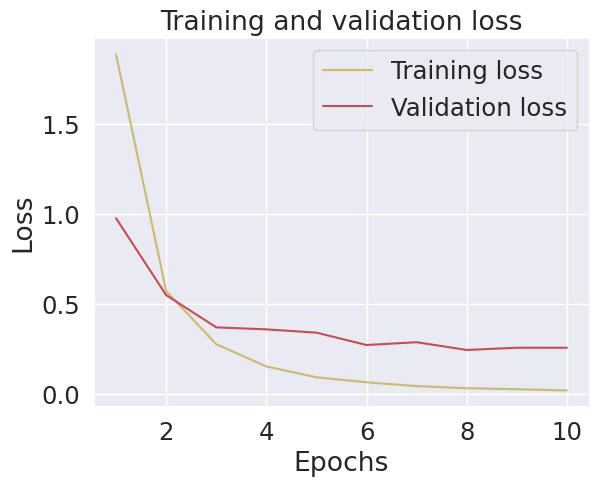

In [ ]:
loss = history3.history['loss']
val_loss = history3.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

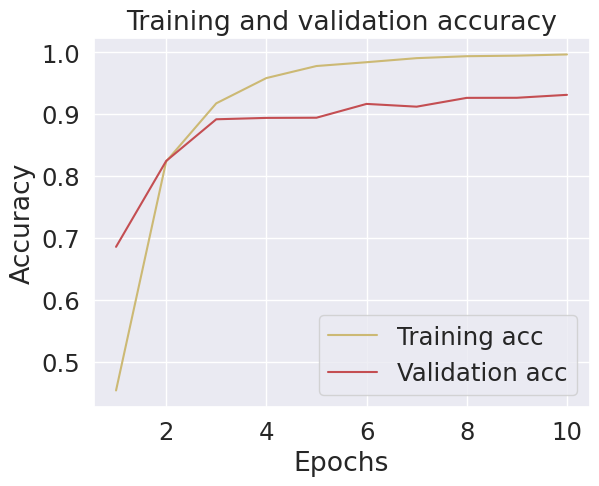

In [ ]:
acc = history3.history['acc']
val_acc = history3.history['val_acc']

plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
prediction3 = np.argmax(model3.predict(x_test),axis=-1)

225/225 [==============================] - 0s 2ms/step


In [ ]:
from sklearn.metrics import accuracy_score
accuracy3 = accuracy_score(y_test, prediction3)
print('Accuracy Score = ', accuracy3)

Accuracy Score =  0.9313998884551031


In [ ]:
print('accuracy of model1 is= ',accuracy1,'accuracy of model 2 is= ',accuracy2,'accuracy of model 3 is =',accuracy3)

accuracy of model1 is=  0.9284718349135527 accuracy of model 2 is=  0.8590351366424986 accuracy of model 3 is = 0.9313998884551031


#ensembling

In [ ]:
from keras.models import load_model
from sklearn.metrics import accuracy_score

In [ ]:
model1 = load_model('saved_models/model1.hdf5')
model2 = load_model('saved_models/model2.hdf5')
model3 = load_model('saved_models/model3.hdf5')

In [ ]:
models = [model1,model2,model3]

In [ ]:
preds =[model.predict(x_test) for model in models]

225/225 [==============================] - 0s 2ms/step


In [ ]:
preds = np.array(preds)

In [ ]:
summed = np.sum(preds, axis=0)

In [ ]:
summed.shape

(7172, 25)

In [ ]:
ensemble_prediction = np.argmax(summed, axis=1)

In [ ]:
prediction1 = np.argmax(model1.predict(x_test),axis=-1)
prediction2 = np.argmax(model2.predict(x_test),axis=-1)
prediction3 = np.argmax(model3.predict(x_test),axis=-1)

225/225 [==============================] - 0s 2ms/step


In [ ]:
accuracy1=accuracy_score(y_test,prediction1)
accuracy2=accuracy_score(y_test,prediction2)
accuracy3=accuracy_score(y_test,prediction3)
ensemble_accuracy = accuracy_score(y_test,ensemble_prediction)

In [ ]:
print('Accuracy Score for model1 = ', accuracy1)
print('Accuracy Score for model2 = ', accuracy2)
print('Accuracy Score for model3 = ', accuracy3)
print('Accuracy Score for average ensemble = ', ensemble_accuracy)

Accuracy Score for model1 =  0.9284718349135527
Accuracy Score for model2 =  0.8590351366424986
Accuracy Score for model3 =  0.9313998884551031
Accuracy Score for average ensemble =  0.9486893474623536


#enhancement ensemble lr

In [ ]:
models = [model1, model2, model3]

In [ ]:
preds =[model.predict(x_test) for model in models]

225/225 [==============================] - 0s 2ms/step


In [ ]:
preds = np.array(preds)

In [ ]:
weights=[0.4,0.2,0.4]

In [ ]:
weights_preds = np.tensordot(preds,weights,axes=((0),(0)))

In [ ]:
weights_ensemble_prediction = np.argmax(weights_preds,axis=1)

In [ ]:
weighted_accuracy = accuracy_score(y_test,weights_ensemble_prediction)

In [ ]:
print('Accuracy Score for model1 = ', accuracy1)
print('Accuracy Score for model2 = ', accuracy2)
print('Accuracy Score for model3 = ', accuracy3)
print('Accuracy Score for average ensemble = ', ensemble_accuracy)
print('Accuracy Score for average ensemble = ', weighted_accuracy)

Accuracy Score for model1 =  0.9284718349135527
Accuracy Score for model2 =  0.8590351366424986
Accuracy Score for model3 =  0.9313998884551031
Accuracy Score for average ensemble =  0.9486893474623536
Accuracy Score for average ensemble =  0.9517568321249302


#enhancement 2

In [ ]:
models = [model1, model2, model3]

In [ ]:
preds1 =[model.predict(x_test) for model in models]

225/225 [==============================] - 0s 2ms/step


In [ ]:
preds1 = np.array(preds1)

In [ ]:
df = pd.DataFrame([])

In [ ]:
for w1 in range(0, 5):
  for w2 in range(0, 5):
    for w3 in range(0, 5):
      wts = [w1/10.,w2/10.,w3/10.]
      wted_preds1 = np.tensordot(preds1,wts,axes=((0),(0)))
      wted_ensemble_pred = np.argmax(wted_preds1,axis=1)
      weighted_accuracy = accuracy_score(y_test,wted_ensemble_pred)
      df = df.append(pd.DataFrame({'wt1':wts[0],'wt2':wts[1],
                                   'wt3':wts[2],'acc':weighted_accuracy*100},index=[0]),ignore_index=True)


<ipython-input-89-6a442d71ee85>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({'wt1':wts[0],'wt2':wts[1],
<ipython-input-89-6a442d71ee85>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({'wt1':wts[0],'wt2':wts[1],
<ipython-input-89-6a442d71ee85>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({'wt1':wts[0],'wt2':wts[1],
<ipython-input-89-6a442d71ee85>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({'wt1':wts[0],'wt2':wts[1],
<ipython-input-89-6a442d71ee85>:8: FutureWarning: The frame.append method is deprecated and will

In [ ]:
max_acc_row = df.iloc[df['acc'].idxmax()]
print("Max accuracy of ", max_acc_row[3], " obained with w1=", max_acc_row[0],
      " w2=", max_acc_row[1], " and w3=", max_acc_row[2])

Max accuracy of  95.37088678192973  obained with w1= 0.3  w2= 0.2  and w3= 0.4


In [ ]:
models = [model1, model2, model3]

In [ ]:
preds = [model.predict(x_test) for model in models]

225/225 [==============================] - 0s 2ms/step


In [ ]:
preds=np.array(preds)

In [ ]:
ideal_weights = [0.3, 0.2, 0.4]

In [ ]:
ideal_weighted_preds = np.tensordot(preds, ideal_weights, axes=((0),(0)))
ideal_weighted_ensemble_prediction = np.argmax(ideal_weighted_preds, axis=1)

In [ ]:
ideal_weighted_accuracy = accuracy_score(y_test, ideal_weighted_ensemble_prediction)

In [ ]:
ideal_weighted_accuracy

0.9537088678192973

Predicted Label:  E
True Label:  E


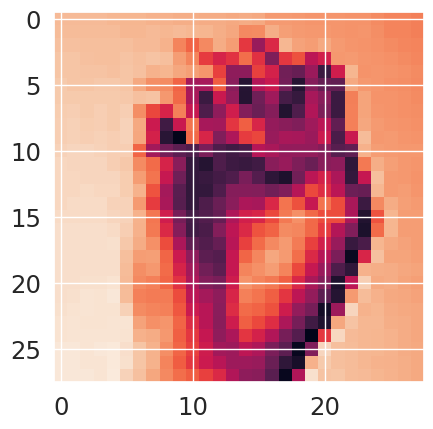

In [ ]:
i = random.randint(1,len(ideal_weighted_ensemble_prediction))
plt.imshow(x_test[i,:,:,0])
print("Predicted Label: ", class_names[int(ideal_weighted_ensemble_prediction[i])])
print("True Label: ", class_names[int(y_test[i])])

<Axes: >

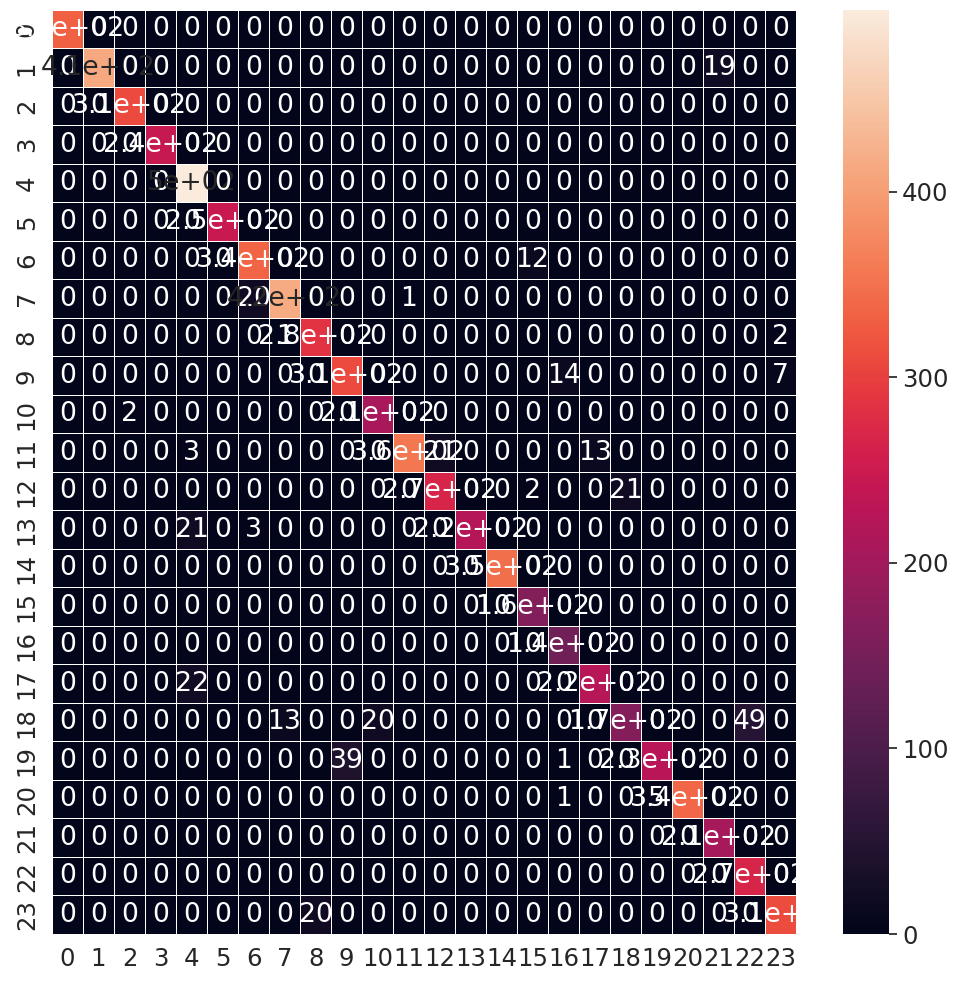

In [ ]:
cm = confusion_matrix(y_test, ideal_weighted_ensemble_prediction)

fig, ax = plt.subplots(figsize=(12,12))
sns.set(font_scale=1.6)
sns.heatmap(cm, annot=True, linewidths=.5, ax=ax)

([<matplotlib.axis.XTick at 0x7fb6400aeb60>,
 [Text(0, 0, 'A'),
  Text(1, 0, 'B'),
  Text(2, 0, 'C'),
  Text(3, 0, 'D'),
  Text(4, 0, 'E'),
  Text(5, 0, 'F'),
  Text(6, 0, 'G'),
  Text(7, 0, 'H'),
  Text(8, 0, 'I'),
  Text(9, 0, 'J'),
  Text(10, 0, 'K'),
  Text(11, 0, 'L'),
  Text(12, 0, 'M'),
  Text(13, 0, 'N'),
  Text(14, 0, 'O'),
  Text(15, 0, 'P'),
  Text(16, 0, 'Q'),
  Text(17, 0, 'R'),
  Text(18, 0, 'S'),
  Text(19, 0, 'T'),
  Text(20, 0, 'U'),
  Text(21, 0, 'V'),
  Text(22, 0, 'W'),
  Text(23, 0, 'X'),
  Text(24, 0, 'Y')])

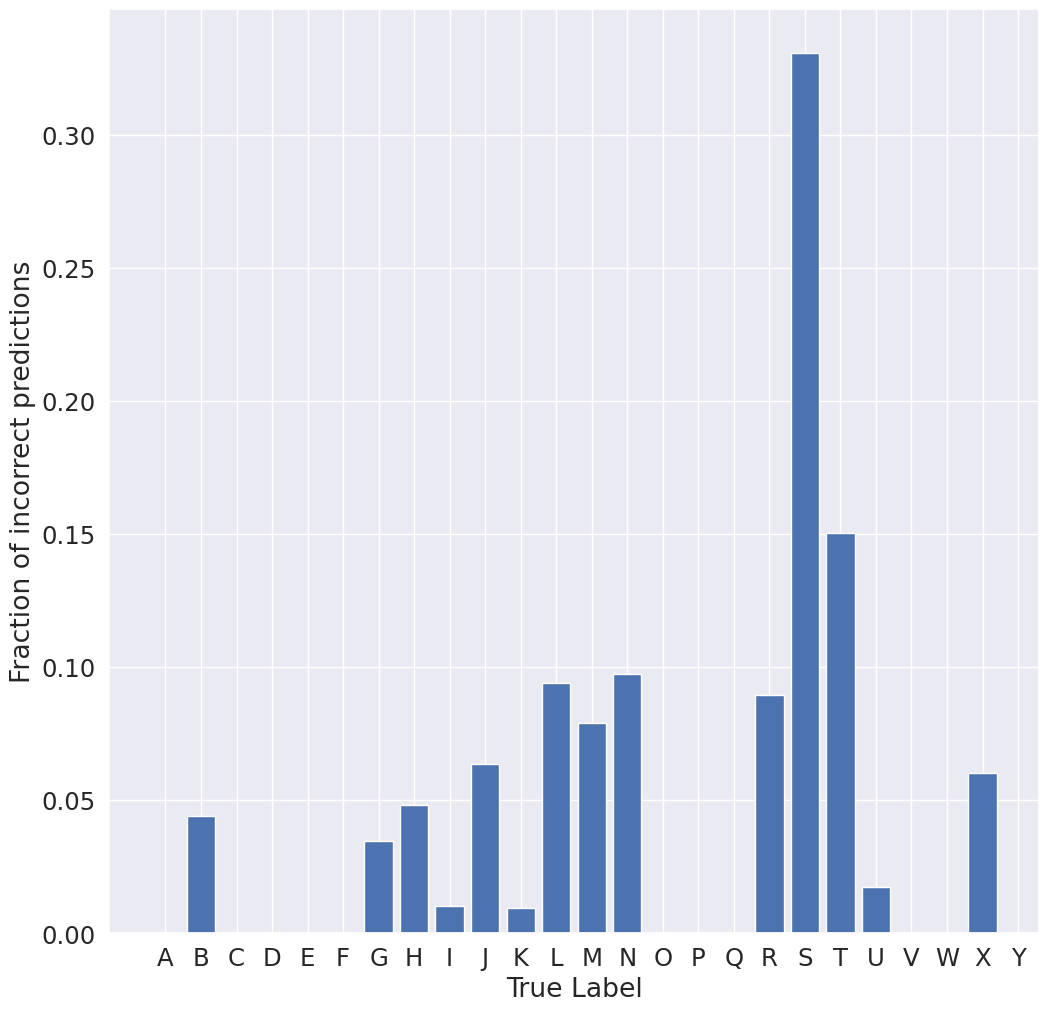

In [ ]:
incorr_fraction = 1 - np.diag(cm) / np.sum(cm, axis=1)
fig, ax = plt.subplots(figsize=(12,12))
plt.bar(np.arange(24), incorr_fraction)
plt.xlabel('True Label')
plt.ylabel('Fraction of incorrect predictions')
plt.xticks(np.arange(25), class_names)